1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


[[ 0.23605841  0.96192624 -0.97366091 ... -0.05590309 -0.17826771
   0.30345228]
 [ 1.50884353  3.74449806 -4.99753486 ...  1.03619435 -3.06992541
   3.59078753]
 [ 1.98096036  5.66835054 -6.94485669 ...  0.92438818 -3.42646082
   4.19769209]]


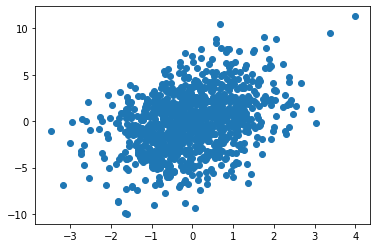

In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
N = 1000
x1 = npr.randn(N)
x2 = x1 + npr.randn(N)*(3)
x3 = 2*x1 + x2

X=np.array( [x1,x2,x3] )
print(X)
C = np.cov(X)
C

plt.scatter(x1,x2)
plt.show()

In [2]:
from scipy import linalg as la

l, V = la.eig(C)

print(np.real_if_close(l))

[ 2.76613447e+01 -6.72428400e-16  1.92909684e+00]


In [3]:
U, spectrum, Vt = la.svd(C)
print (spectrum,'\n')


[2.76613447e+01 1.92909684e+00 1.05974066e-15] 



In [4]:
Lambda=np.diag(l)
print (Lambda)
print ("A.trace():", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print ((Lambda[0,0]+Lambda[2,2])/Lambda.trace())


[[ 2.76613447e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -6.72428400e-16+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  1.92909684e+00+0.j]]
A.trace(): 29.590441590645938
Lambda.trace(): (29.59044159064595+0j)
(1+0j)


In [5]:
Xr = [x1,x3]
Cr = np.cov(Xr)

lr, Vr = la.eig(Cr)
lr = np.real_if_close(lr)
print(lr)

[ 0.46567499 19.09823167]


In [6]:
X_rot = np.dot(V.T, X)
X_rot

array([[-2.49880679e+00, -6.85671400e+00,  8.61069580e+00, ...,
        -1.33611669e+00,  4.55779724e+00, -5.49654870e+00],
       [ 1.49256034e-17,  4.06680622e-16, -3.97358425e-17, ...,
        -2.04730150e-16,  2.14970162e-16, -2.54409413e-16],
       [-1.11807472e-01,  2.49476895e-01,  1.01599627e-01, ...,
        -3.82242807e-01,  6.50645422e-01, -6.28020406e-01]])

C:\Users\prontoalluso\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


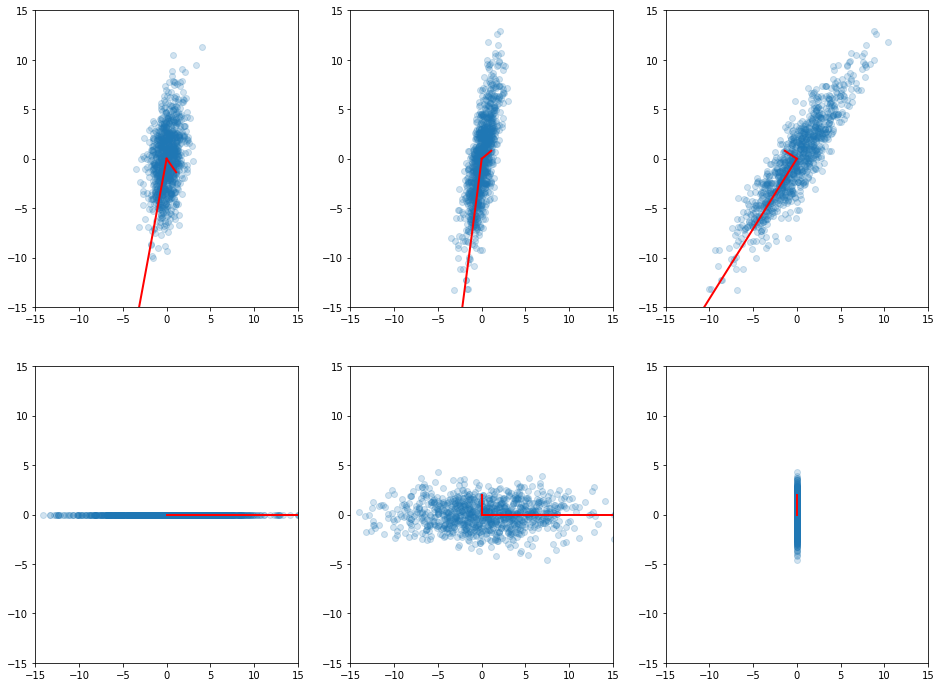

<Figure size 720x432 with 0 Axes>

In [7]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12))

plt.figure(figsize=(10,6))

ax[0,0].scatter(X[0,:], X[1,:], marker = 'o', alpha = 0.2)
for li, vi in zip(l, V.T):
    ax[0,0].plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)

ax[0,1].scatter(X[0,:], X[2,:], marker = 'o', alpha = 0.2)
for li, vi in zip(l, V.T):
    ax[0,1].plot([0, li*vi[0]], [0, li*vi[2]], 'r-', lw=2)

ax[0,2].scatter(X[1,:], X[2,:], marker = 'o', alpha = 0.2)
for li, vi in zip(l, V.T):
    ax[0,2].plot([0, li*vi[1]], [0, li*vi[2]], 'r-', lw=2)

ax[1,0].scatter(X_rot[0,:], X_rot[1,:], marker = 'o', alpha = 0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax[1,0].plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)

ax[1,1].scatter(X_rot[0,:], X_rot[2,:], marker = 'o', alpha = 0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax[1,1].plot([0, li*vi[0]], [0, li*vi[2]], 'r-', lw=2)

ax[1,2].scatter(X_rot[1,:], X_rot[2,:], marker = 'o', alpha = 0.2)
for li, vi in zip(l, np.diag([1]*3)):
    ax[1,2].plot([0, li*vi[1]], [0, li*vi[2]], 'r-', lw=2)

for i in range(0,2):
    for j in range(0,3):
        ax[i,j].set_ylim(-15, 15)
        ax[i,j].set_xlim(-15, 15)
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [8]:
import pandas as pd
import random
print(X)
A = np.array(X)
for i in range(0,10):
    std = 1/50
    k = np.array( npr.randn(N) * std )
    A = np.concatenate((A,[k]))
    
df = pd.DataFrame(A)
df


[[ 0.23605841  0.96192624 -0.97366091 ... -0.05590309 -0.17826771
   0.30345228]
 [ 1.50884353  3.74449806 -4.99753486 ...  1.03619435 -3.06992541
   3.59078753]
 [ 1.98096036  5.66835054 -6.94485669 ...  0.92438818 -3.42646082
   4.19769209]]


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.236058,0.961926,-0.973661,-1.029015,-0.966651,0.525867,-0.276043,1.671014,0.577591,0.182829,...,-0.524132,-0.638364,-0.966847,-0.052146,0.212043,-0.538370,-1.351868,-0.055903,-0.178268,0.303452
1,1.508844,3.744498,-4.997535,-4.151479,1.398622,-3.220999,-3.243115,-0.462181,8.864250,3.387162,...,1.764573,1.400364,-2.203018,-0.720947,-2.919407,-1.207650,-2.247610,1.036194,-3.069925,3.590788
2,1.980960,5.668351,-6.944857,-6.209509,-0.534679,-2.169265,-3.795201,2.879848,10.019432,3.752819,...,0.716308,0.123636,-4.136712,-0.825239,-2.495322,-2.284390,-4.951347,0.924388,-3.426461,4.197692
3,0.009085,-0.000678,0.017679,0.025351,0.002465,-0.007688,0.008046,-0.026297,-0.002788,-0.021301,...,-0.017413,0.008828,0.014291,0.013929,0.000042,-0.010764,-0.003324,0.002901,0.016515,-0.002210
4,-0.009440,-0.022330,0.041908,0.002669,-0.000667,-0.000765,0.007577,-0.021288,-0.009784,0.019562,...,-0.000929,0.005354,-0.003740,-0.000923,0.009436,0.024214,-0.033141,-0.001033,-0.025769,0.018634
5,-0.019152,-0.010460,0.032758,0.029955,0.013226,-0.013842,-0.029906,0.036654,-0.016729,-0.012981,...,0.017900,0.005629,-0.007515,0.001443,-0.013999,0.010715,0.009597,-0.010925,-0.012564,-0.008506
6,-0.009523,0.030740,-0.025349,-0.022110,0.020415,0.005615,0.024446,0.024490,0.000294,0.010351,...,-0.001430,-0.001151,0.019367,-0.009723,0.001021,0.010341,0.046311,0.037630,0.007106,-0.016982
7,0.001791,0.021703,-0.028973,-0.019516,-0.002642,0.036017,0.024929,-0.005914,0.015460,0.003708,...,0.039182,-0.022854,0.005350,-0.006624,-0.000299,0.024292,0.007443,0.011258,0.025304,-0.019970
8,0.045166,-0.024157,0.001003,-0.000131,0.009769,0.006622,-0.004766,0.010679,0.017050,-0.018716,...,-0.002104,-0.007350,0.009858,-0.013246,0.005852,-0.037787,0.011813,-0.001682,-0.029791,0.015172
9,-0.052608,0.001733,0.017727,-0.035398,-0.000439,0.022878,0.013144,0.011807,-0.013031,0.026039,...,-0.011721,-0.020402,0.025739,0.004762,-0.033253,0.002415,-0.011464,-0.010798,-0.000827,-0.006011


In [9]:
l, V = la.eig(np.cov(A))
Lambda=np.diag(l)
print (l)
print ("A.trace():", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print ((Lambda[0,0]+Lambda[2,2])/Lambda.trace())

[ 2.76613469e+01+0.j  1.92909815e+00+0.j -9.46516938e-16+0.j
  4.62537729e-04+0.j  3.34489509e-04+0.j  4.36068013e-04+0.j
  4.17539629e-04+0.j  4.05487259e-04+0.j  3.98479756e-04+0.j
  3.91793821e-04+0.j  3.80014387e-04+0.j  3.78205196e-04+0.j
  3.70501279e-04+0.j]
A.trace(): 29.590441590645938
Lambda.trace(): (29.594420138530694+0j)
(0.9346811576344155+0j)


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [10]:
N = 1000
alfa = 0
w = 0.5
A = 3
t = np.arange(N)

def motion(t, A, w, alfa):
    return A * np.cos(w*t + alfa)

x = motion(t, A, w, alfa)

y = np.random.normal(scale = 0.5, size = N)


z = np.zeros(N)

X = np.concatenate(([x], [y], [z]), axis = 0)

l, V = la.eig(np.cov(X))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)

eigenvalues :
 [4.50915689+0.j 0.26315925+0.j 0.        +0.j]
eigenvectors:
 [[ 0.99996965  0.00779154  0.        ]
 [-0.00779154  0.99996965  0.        ]
 [ 0.          0.          1.        ]]


100.0
[[ 1.68978607  1.66443893  1.32454668 ... -1.66036955 -1.24174313
  -2.13901314]
 [-1.80514081 -1.45581163 -0.68431098 ...  0.4133046   1.73544162
   1.48722668]
 [ 1.80514081  1.45581163  0.68431098 ... -0.4133046  -1.73544162
  -1.48722668]]


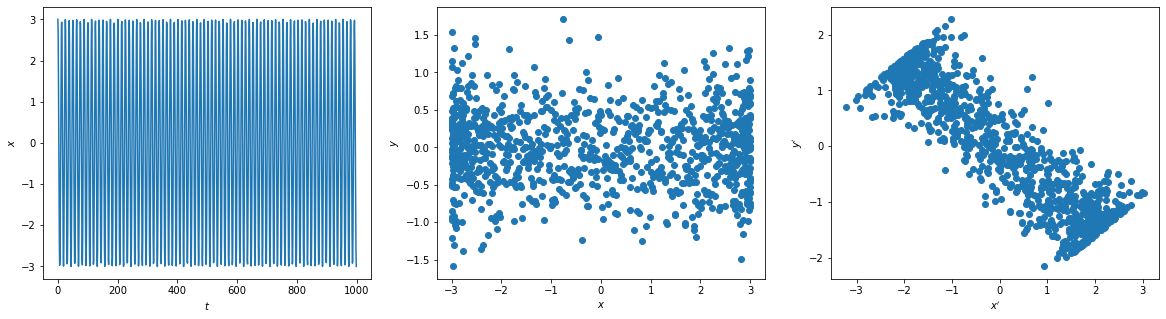

In [18]:
perc  = (l[0] + l[1]) / l.sum()
print((np.real_if_close(perc)*100))


fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
ax1.plot(t,X[0])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$')

ax2.scatter(X[0], X[1])
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')


def rotation(X, Theta, Phi):
    Theta = Theta*np.pi/180
    Phi = Phi*np.pi/180
    Rtheta = np.array([[1, 0, 0],
                      [0, np.cos(Theta), np.sin(Theta)],
                      [0, -np.sin(Theta), np.cos(Theta)]])
    Rphi = np.array([[np.cos(Phi), np.sin(Phi), 0],
                    [-np.sin(Phi), np.cos(Phi), 0],
                    [0, 0, 1]])
    R = np.dot(Rtheta, Rphi)
    return np.dot(R, X), R

print(Xr)
Xr, R = rotation(X, 45, 45)
ax3.scatter(Xr[0], Xr[1])
ax3.set_xlabel("$x'$")
ax3.set_ylabel("$y'$")
plt.show()

In [20]:
l, V = la.eig(np.cov(Xr))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)

Lambda = np.diag(l)
print("A.trace():", np.cov(Xr).trace())
print("Lambda.trace():", Lambda.trace())



eigenvalues :
 [4.50915689e+00+0.j 2.63159246e-01+0.j 2.07762706e-32+0.j]
eigenvectors:
 [[ 7.01575867e-01 -7.12594767e-01 -3.59607577e-16]
 [-5.03880592e-01 -4.96089053e-01  7.07106781e-01]
 [ 5.03880592e-01  4.96089053e-01  7.07106781e-01]]
A.trace(): 4.77231613674711
Lambda.trace(): (4.772316136747106+0j)


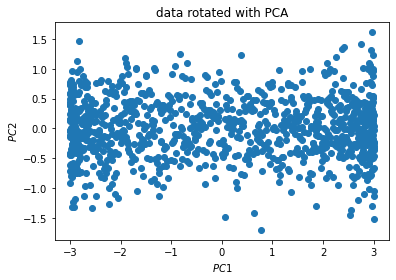

[[-7.01575671e-01 -7.12594960e-01 -1.45094224e-16]
 [ 5.03880729e-01 -4.96088915e-01  7.07106781e-01]
 [-5.03880729e-01  4.96088915e-01  7.07106781e-01]]


In [26]:
U, spectrum, Vt = np.linalg.svd(Xr)
l_svd = spectrum**2/(N-1)
V_svd = U


Xrr = np.dot(Xr.T, U) #Applying PCA rotation
plt.plot(Xrr[:,0], Xrr[:,1], 'o')
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.title('data rotated with PCA')
plt.show()
print(U)


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [30]:
!type magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [31]:
header = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
          'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data   = pd.read_csv('magic04.data', names = header)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [32]:
X = data.values[:,:-1].astype(float)
print(X)


[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.9018   3.9939 ... -63.8389  84.6874 408.3166]
 [187.1814  53.0014   3.2093 ...  31.4755  52.731  272.3174]]


In [33]:
l, V = la.eig(np.cov(X.T))
print('eigenvalues :\n', l)
print('eigenvectors:\n', V)

eigenvalues :
 [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j]
eigenvectors:
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  1.8138

In [34]:
Lambda = np.diag(l)
print("A.trace():", np.cov(X.T).trace())
print("Lambda.trace():", Lambda.trace())


A.trace(): 14938.018711416578
Lambda.trace(): (14938.018711416571+0j)


In [35]:
X_rot = np.dot(V.T, X.T)
X_rot

print("Covariance matrix:\n", np.cov(X_rot.T))

Covariance matrix:
 [[ 1145.23715961  2061.0306704   3441.47041295 ...  2720.96706429
   4008.71358512  2062.20295628]
 [ 2061.0306704   4722.13687796  6326.73035374 ...  5937.4121449
   8699.18778765  5118.18624026]
 [ 3441.47041295  6326.73035374 13913.5482082  ...  8479.52195675
  14412.20477515  9254.37460105]
 ...
 [ 2720.96706429  5937.4121449   8479.52195675 ...  7986.05943954
  11454.31663523  7860.15485113]
 [ 4008.71358512  8699.18778765 14412.20477515 ... 11454.31663523
  18564.50573212 13415.93516644]
 [ 2062.20295628  5118.18624026  9254.37460105 ...  7860.15485113
  13415.93516644 15863.77956291]]
